Name: Artur Sak

NetID:(sak2)

### Introduction

In this lab, we will use deep neural networks for image classification. We will use tensorflow for this lab. Please make sure you can install and run tensorflow before you leave. 

If you are using SageMathCloud, opencv and tensorflow are already installed, you can skip this note.

## Notes on Tensorflow

Install: https://www.tensorflow.org/install/

Tutorials: https://www.tensorflow.org/get_started/get_started and
           https://www.tensorflow.org/get_started/mnist/pros

Tensorflow API: https://www.tensorflow.org/api_docs/python/



# Part 1: Introduction to Tensorflow

Make sure you have installed tensorflow correctly. After you installed it, let's check the version first. The tensorflow on the instructor's machine is 0.12. **If you use a different version of tensorflow, you may need to change some function names to make it work properly.** Check the API of different versions of tensorflow here: https://www.tensorflow.org/versions/

In [1]:
import tensorflow as tf
print(tf.__version__)

0.12.1


## TensorFlow Sessions
- A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

In [2]:
import numpy as np

sess = tf.Session()

A_tf = tf.random_uniform([2,3])   # A_tf is a tensorflow variable
print A_tf
print ("----------------------------------------------")
sess.run(tf.global_variables_initializer())
A_tf_evaluted = sess.run(A_tf)   # A_tf_evaluted is a numpy array
print A_tf_evaluted

Tensor("random_uniform:0", shape=(2, 3), dtype=float32)
----------------------------------------------
[[ 0.15313363  0.97119927  0.52935517]
 [ 0.22556722  0.43286049  0.5038147 ]]


In [3]:
# Let's do a simple matrix multiplication
A = tf.constant(1.0, shape=[2,3])
x = tf.constant([1.0,2.0,3.0], shape=[3,1])
b = tf.matmul(A,x)

sess.run(tf.global_variables_initializer())
print("A:")
print sess.run(A)
print("x:")
print sess.run(x)
print("b:")
print sess.run(b)

A:
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
x:
[[ 1.]
 [ 2.]
 [ 3.]]
b:
[[ 6.]
 [ 6.]]


## Exercise 1: Linear Regression using tensorflow

Let's create some linear data that $y = ax + b,$ and add some random noise. 

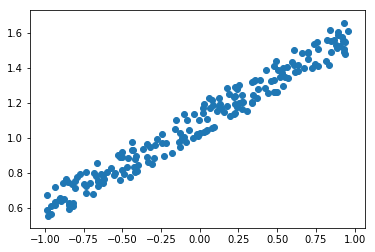

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt


# Create 200 data points, using a linear model with noise.
x = (np.random.rand(200,1)-0.5)*2.0
noise = 10*np.random.rand(200,1)
b = 1
a = 0.5
y = a*x+ b +0.02*noise 
plt.scatter(x,y)

# Pad x with 1 for bias-term.
x = np.concatenate((x,np.ones(x.shape)),axis=1)

Given the data $x$ and $y$, our task is to estimate the parameters $a$ and $b$. Let's define the trainable variable in Tensorflow:

In [5]:
w = tf.Variable(tf.random_normal([2,1]))  # Random initialize the weight and bias 

$w$ contains the two parameters we want to estimate. It will be updated during training. The next step is to construct the computational graph in Tensorflow, by which you tell Tensorflow how to update the variable. 

In [6]:
# Define computational graph using placeholders
X_placeholder = tf.placeholder(tf.float32, shape=[None,2])  # Define a placeholder for the data x
y_placeholder = tf.placeholder(tf.float32, shape=[None,1])  # Define a placeholder for the data y

# y_hat is the output by using w
y_hat = tf.matmul(X_placeholder,w)

#Your code here: define your loss, you can use the L2 distance bewteen the predict y_hat and real y in the data
loss = tf.sqrt(tf.reduce_sum(tf.square(y_hat - y_placeholder)))

# Create a gradient descent optimizer. Tensorflow computes the gradients for you!
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

# Defines a session
sess = tf.Session() 
sess.run(tf.global_variables_initializer())

# Performs gradient descent
for step in range(0,100):
    
    sess.run(train_op, {X_placeholder:x, y_placeholder:y})
    #Remember that you will need to use the data x and y above to feed the placeholder
    
    if step % 5 == 0:
        _, loss_np = sess.run([train_op, loss], feed_dict={X_placeholder:x, y_placeholder:y})
        print("Loss at step %d: %f" % (step, loss_np))

print ("----------------------------------------------")        
print sess.run(w)

Loss at step 0: 16.949755
Loss at step 5: 15.955282
Loss at step 10: 14.976724
Loss at step 15: 14.015948
Loss at step 20: 13.075070
Loss at step 25: 12.156473
Loss at step 30: 11.262812
Loss at step 35: 10.397012
Loss at step 40: 9.562226
Loss at step 45: 8.761756
Loss at step 50: 7.998897
Loss at step 55: 7.276713
Loss at step 60: 6.597726
Loss at step 65: 5.963530
Loss at step 70: 5.374402
Loss at step 75: 4.829021
Loss at step 80: 4.324405
Loss at step 85: 3.856175
Loss at step 90: 3.419162
Loss at step 95: 3.008256
----------------------------------------------
[[ 0.18831961]
 [ 1.06073427]]




# Part 2 classify MNIST using a simple model.

We first classify MNIST using a simple Multi-layer percepetron

We are going to create a simple Multi-layer percepetron, a simple type of Neural Network, to performe classification tasks on the MNIST digits dataset. If you are not familiar with the MNIST dataset, please consider to read more about it: <a href="http://yann.lecun.com/exdb/mnist/">click here</a> 
According to Lecun's website, the MNIST is a: "database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image".

### Import the MNIST dataset using TensorFlow built-in feature

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The <span style="background-color:#dcdcdc
"> One-hot = True</span> argument only means that, in contrast to Binary representation, the labels will be presented in a way that only one bit will be on for a specific digit. For example, five and zero in a binary code would be:

<pre>
Number representation:    0
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       0       0       0 

Number representation:    5
Binary encoding:        [2^5]  [2^4]   [2^3]   [2^2]   [2^1]   [2^0]  
Array/vector:             0      0       0       1       0       1  
</pre>

Using a different notation, the same digits using one-hot vector representation can be show as: 

<pre>
Number representation:    0
One-hot encoding:        [5]   [4]    [3]    [2]    [1]   [0]  
Array/vector:             0     0      0      0      0     1   

Number representation:    5
One-hot encoding:        [5]   [4]    [3]    [2]    [1]    [0]  
Array/vector:             1     0      0      0      0      0   
</pre>

The imported data can be divided as follow:

- Training (mnist.train) >>  Use the given dataset with inputs and related outputs for training of NN. In our case, if you give an image that you know that represents a "nine", this set will tell the neural network that we expect a "nine" as the output.  
        - 55,000 data points
        - mnist.train.images for inputs
        - mnist.train.labels for outputs
  
   
- Validation (mnist.validation) >> The same as training, but now the date is used to generate model properties (classification error, for example) and from this, tune parameters like the optimal number of hidden units or determine a stopping point for the back-propagation algorithm  
        - 5,000 data points
        - mnist.validation.images for inputs
        - mnist.validation.labels for outputs
  
  
- Test (mnist.test) >> the model does not have access to this informations prior to the test phase. It is used to evaluate the performance and accuracy of the model against "real life situations". No further optimization beyond this point.  
        - 10,000 data points
        - mnist.test.images for inputs
        - mnist.test.labels for outputs

### Creating an interactive section

You have two basic options when using TensorFlow to run your code:

- [Build graphs and run session] Do all the set-up and THEN execute a session to evaluate tensors and run operations (ops) 
- [Interactive session] create your coding and run on the fly. 

For this first part, we will use the interactive session that is more suitable for environments like Jupyter notebooks.

In [8]:
sess = tf.InteractiveSession()

### Creating placeholders

It's a best practice to create placeholders before variable assignments when using TensorFlow. Here we'll create placeholders for inputs ("Xs") and outputs ("Ys").   

__Placeholder 'X':__ represents the "space" allocated input or the images. 
       * Each input has 784 pixels distributed by a 28 width x 28 height matrix   
       * The 'shape' argument defines the tensor size by its dimensions.  
       * 1st dimension = None. Indicates that the batch size, can be of any size.  
       * 2nd dimension = 784. Indicates the number of pixels on a single flattened MNIST image.  
      
__Placeholder 'Y':___ represents the final output or the labels.  
       * 10 possible classes (0,1,2,3,4,5,6,7,8,9)  
       * The 'shape' argument defines the tensor size by its dimensions.  
       * 1st dimension = None. Indicates that the batch size, can be of any size.   
       * 2nd dimension = 10. Indicates the number of targets/outcomes 

__dtype for both placeholders:__ if you not sure, use tf.float32. The limitation here is that the later presented softmax function only accepts float32 or float64 dtypes. For more dtypes, check TensorFlow's documentation <a href="https://www.tensorflow.org/versions/r0.9/api_docs/python/framework.html#tensor-types">here</a>


In [9]:
x  = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### Assigning bias and weights to null tensors

Now we are going to create the weights and biases, for this purpose they will be used as arrays filled with zeros. The values that we choose here can be critical, but we'll cover a better way on the second part, instead of this type of initialization.

In [10]:
# Weight tensor
W = tf.Variable(tf.zeros([784,10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

### Execute the assignment operation 

Before, we assigned the weights and biases but we did not initialize them with null values. For this reason, TensorFlow need to initialize the variables that you assign.  
Please notice that we're using this notation "sess.run" because we previously started an interactive session.

In [11]:
# run the op initialize_all_variables using an interactive session
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


### Adding Weights and Biases to input

The only difference from our next operation to the picture below is that we are using the mathematical convention for what is being executed in the illustration. The tf.matmul operation performs a matrix multiplication between x (inputs) and W (weights) and after the code add biases.


<img src="https://ibm.box.com/shared/static/88ksiymk1xkb10rgk0jwr3jw814jbfxo.png" alt="HTML5 Icon" style="width:400px;height:350px;"> 
<div style="text-align:center">Illustration showing how weights and biases are added to neurons/nodes. </div>


In [12]:
#mathematical operation to add weights and biases to the inputs
tf.matmul(x,W) + b

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

### Softmax Regression

Softmax is an activation function that is normally used in classification problems. It generate the probabilities for the output. For example, our model will not be 100% sure that one digit is the number nine, instead, the answer will be a distribution of probabilities where, if the model is right, the nine number will have the larger probability.

For comparison, below is the one-hot vector for a nine digit label:

A machine does not have all this certainty, so we want to know what is the best guess, but we also want to understand how sure it was and what was the second better option. Below is an example of a hypothetical distribution for a nine digit:

In [13]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution. 

### Cost function

It is a function that is used to minimize the difference between the right answers (labels) and estimated outputs by our Network. 

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

### Type of optimization: Gradient Descent

This is the part where you configure the optimizer for you Neural Network. There are several optimizers available, in our case we will use Gradient Descent that is very well stablished.

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Training batches

Train using minibatch Gradient Descent.

In practice, Batch Gradient Descent is not often used because is too computationally expensive. The good part about this method is that you have the true gradient, but with the expensive computing task of using the whole dataset in one time. Due to this problem, Neural Networks usually use minibatch to train.

In [16]:
#Load 50 training examples for each training iteration   
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

### Test

In [17]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )

The final accuracy for the simple ANN model is: 90.9200012684 % 


In [18]:
sess.close() #finish the session

Is the final result good?

**According to the Tensorflow documentation this result for MNIST is embarassingly bad.**

Let's check the best algorithm available out there (10th june 2016):
  
_Result:_ 0.21% error (99.79% accuracy)  
<a href="http://cs.nyu.edu/~wanli/dropc/">Reference here</a>

# Part 3: Image Classification by Quality

Let's load the MNIST data again.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 28, 28, 1)


(-0.5, 27.5, 27.5, -0.5)

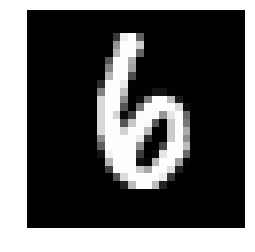

In [19]:
%matplotlib inline

from scipy import ndimage
from tensorflow.examples.tutorials.mnist import input_data



mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# get one image from the training dataset
train_set = np.reshape(mnist.train.images, (-1,28,28,1))

print(train_set.shape)

# pick a random image for display, for example, image 230
plt.imshow(np.squeeze(train_set[230,:,:,:]), cmap='gray'); plt.axis('off')


## Exercise 2: Create your training and testing data

We will train a model to classify the images into two classes: blurry images and sharp images. We can create the dataset by using Gaussian filters. The original MNIST images are labeled as 0s, while the blurry images are labeled as 1s. Return the processed data and the label. Make sure you can create a dataset with different degrees of blurriness. 

In [56]:
import random
def prepare_dataset(data):
#input: a 4D tensor of images
#output: x, a 4D tensor of images after processing
#        y, your labels  
    x = np.float32(np.copy(data))
    y = np.zeros((x.shape[0],2))
    blurred = np.round(np.random.uniform(0,1,x.shape[0]))
    blurred.astype(np.int64)
    
    for i in range(x.shape[0]):
        if blurred[i] == 0:
            x[i] = ndimage.filters.gaussian_filter(x[i],sigma=random.randint(1,7))
            y[i,1] = 1
        else:
            y[i,0] = 1
    
    return x, y

Let's test the function first before going further. The following code generate a figure that compare the original data and your dataset (contains both shape and blurry images). Run it a couple of times to make sure you can see both postive and negtive examples. 

In [57]:
data_train = np.reshape(mnist.train.images, (-1,28,28,1))
x_train, y_train = prepare_dataset(data_train)

#Show some examples of your processed data
idx = np.random.randint(low=0, high =data_train.shape[0], size =4)

('Labels for the for images are: ', array([ 0.,  1.]), array([ 1.,  0.]), array([ 1.,  0.]), array([ 0.,  1.]))


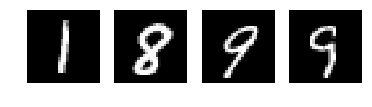

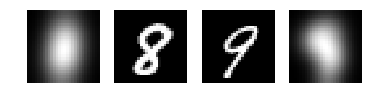

In [58]:
#Original MNIST data
fig = plt.figure(1)
plt.subplot(141)
plt.imshow(np.squeeze(data_train[idx[0],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(142)
plt.imshow(np.squeeze(data_train[idx[1],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(143)
plt.imshow(np.squeeze(data_train[idx[2],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(144)
plt.imshow(np.squeeze(data_train[idx[3],:,:,:]), cmap='gray'); plt.axis('off')


#Your data
fig = plt.figure(2)
plt.subplot(141)
plt.imshow(np.squeeze(x_train[idx[0],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(142)
plt.imshow(np.squeeze(x_train[idx[1],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(143)
plt.imshow(np.squeeze(x_train[idx[2],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(144)
plt.imshow(np.squeeze(x_train[idx[3],:,:,:]), cmap='gray'); plt.axis('off')


#print their labels for our task
print('Labels for the for images are: ', y_train[idx[0]],y_train[idx[1]],y_train[idx[2]],y_train[idx[3]])

## Exercise 3: Construct your deep neural network

The next step is to build your multi-layer network. The input is a 4D tensor (batch_size, height, width, channels) and the output is the logits for classification. You can build any model you want, but it is required to contain convolution layers, nonlinear activation functions, and fully connected layer(s). **Explain your choice and list each layer.** 

In [107]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def maxpool2d(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def model(input):
    input = tf.reshape(input, shape=[-1, 28, 28, 1])
    conv1 = conv2d(input, tf.Variable(tf.random_normal([5, 5, 1, 32]))) + tf.Variable(tf.random_normal([32]))
    conv1 = tf.nn.relu(conv1)
    conv1 = maxpool2d(conv1)
    
    conv2 = conv2d(conv1,tf.Variable(tf.random_normal([5,5,32,64]))) + tf.Variable(tf.random_normal([64]))
    conv2 = tf.nn.relu(conv2)
    conv2 = maxpool2d(conv2)
    
    fc = tf.reshape(conv2, shape=[-1,7*7*64])
    fc = tf.nn.relu(tf.matmul(fc, tf.Variable(tf.random_normal([7*7*64,1024]))) + tf.Variable(tf.random_normal([1024])))
    out = tf.matmul(fc, tf.Variable(tf.random_normal([1024, 2]))) + tf.Variable(tf.random_normal([2]))
    
    return out        

**List your layers here (make it easy to read):** 
For example:

Input shape: [batch_size, 28, 28, 1]

Layer 1: *convolution*,  Activation Function: *ReLU*,  Output Shape: [5,5,1,32], Filter Size: 5\*5

Layer 2: *pooling*,  Output Shape: [1, 2, 2, 1], Filter Size: 2\*2

Layer 3: *convolution*, Activation Function: *ReLU*, Output Shape: [5, 5, 32, 64], Filter Size: 5\*5

Layer 4: *pooling*,  Output Shape: [1, 2, 2, 1], Filter Size: 2\*2

Layer 5: *fully connected*,  Activation Function: *ReLU*, Output Shape: [3136, 1024]

Layer 6: *fully connected*,  Output Shape: [1024, 2]

**Explaination of choice:**

For the most part, my neural network was modeled after the MNIST tutorial found on the Tensorflow documentation page (Found here: https://www.tensorflow.org/get_started/mnist/pros). I modified the model to preform binary classification w.r.t image quality on the data set so I modified the final fully connected to have 2 outputs instead of 10. As for the activation function used in the convolutional and fully connected layers I used the popular Rectified Linear Unit (ReLU) as recommended in http://cs231n.github.io/neural-networks-1/#actfun as well as used in the above Tensorflow tutorial.

## Exercise 4: Train your deep neural network


After we build the model, we will start to train it using our dataset. 


In [108]:
#training parameters
max_steps = 500
learning_rate = 0.0003
batch_size = 32

n_input = 784
n_classes = 2

tf.reset_default_graph()

# placeholder for the data
x_placeholder = tf.placeholder(tf.float32, [None, n_input])
y_placeholder = tf.placeholder(tf.float32, [None, n_classes])

keep_prob = tf.placeholder(tf.float32)
y_hat = model(x_placeholder) 

# Define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=y_placeholder))

# Define a placeholder to calculate the classification accuracy in a batch
correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Define optimizer
train_step  = tf.train.AdamOptimizer(learning_rate).minimize(loss)


init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Loss at step 0: 5485.545410
Accuracy at step 0: 0.718750
Loss at step 100: 560.769592
Accuracy at step 100: 0.906250
Loss at step 200: 0.000000
Accuracy at step 200: 1.000000
Loss at step 300: 137.760956
Accuracy at step 300: 0.937500
Loss at step 400: 0.000000
Accuracy at step 400: 1.000000


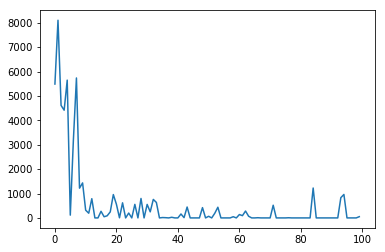

In [109]:
data_size = x_train.shape[0]
epoch_num = int(data_size / batch_size)

loss_plt = []


for step in xrange(0, max_steps):
    batch_idx = step % epoch_num
    if batch_idx == 0:
        # Shuffle dataset.
    
        shuffle_idx = np.random.permutation(data_size)
        x_train = x_train[shuffle_idx,:,:,:]
        y_train = y_train[shuffle_idx]

    # Feed a batch and update the model
    batch_x = (x_train[batch_idx * batch_size: (batch_idx+1) * batch_size]).reshape((-1,784))
    batch_y = y_train[batch_idx * batch_size: (batch_idx+1) * batch_size]
    feed_dict = {x_placeholder: batch_x, y_placeholder: batch_y}
    sess.run(train_step, feed_dict)  
  

    # Output Summary
    if step % 5 == 0:
        loss_value = sess.run(loss, feed_dict = feed_dict)
        loss_plt.append(loss_value)   
    
    if step % 100 == 0:
        print("Loss at step %d: %f" % (step, loss_value))
      
        accuracy_np = sess.run(accuracy, feed_dict=feed_dict)
        print("Accuracy at step %d: %f" % (step, accuracy_np))

# plot the loss to see the changes
plt.plot(loss_plt)    

## Exercise 5: Evaluate your model on the test set


Evaluate the accuracy of your model on the entire test set. Print the accuracy. Show 4 examples of test images, their predicted labels and the correct labels.


In [111]:
data_test = np.reshape(mnist.test.images, (-1,28,28,1))
x_test, y_test = prepare_dataset(data_test)
x_test1 = np.copy(x_test)
x_test = x_test.reshape((-1, 784))
print "Accuracy: " + str(sess.run(accuracy, feed_dict={x_placeholder: x_test, y_placeholder: y_test}) * 100) + "%"

Accuracy: 99.6800005436%


Labels for the for images are:  0 0 1 0


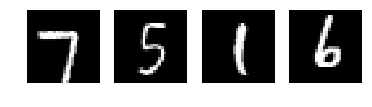

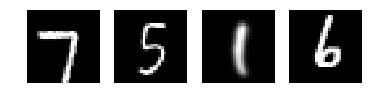

In [112]:
idx = np.random.randint(low=0, high =data_test.shape[0], size =4)
fig = plt.figure(1)
plt.subplot(141)
plt.imshow(np.squeeze(data_test[idx[0],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(142)
plt.imshow(np.squeeze(data_test[idx[1],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(143)
plt.imshow(np.squeeze(data_test[idx[2],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(144)
plt.imshow(np.squeeze(data_test[idx[3],:,:,:]), cmap='gray'); plt.axis('off')

# Your data
fig = plt.figure(2)
plt.subplot(141)
plt.imshow(np.squeeze(x_test1[idx[0],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(142)
plt.imshow(np.squeeze(x_test1[idx[1],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(143)
plt.imshow(np.squeeze(x_test1[idx[2],:,:,:]), cmap='gray'); plt.axis('off')
plt.subplot(144)
plt.imshow(np.squeeze(x_test1[idx[3],:,:,:]), cmap='gray'); plt.axis('off')

# Print their labels for our task
print 'Labels for the for images are: ', np.argmax(y_test[idx[0]]), np.argmax(y_test[idx[1]]), np.argmax(y_test[idx[2]]),np.argmax(y_test[idx[3]])

In [113]:
sess.close()